In [1]:
from google.colab import files
uploaded = files.upload()

Saving COVID-19 Global Statistics Dataset.csv to COVID-19 Global Statistics Dataset.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv('COVID-19 Global Statistics Dataset.csv')

# Show first few rows
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            239 non-null    object 
 1   Total Cases        239 non-null    object 
 2   New Cases          12 non-null     object 
 3   Total Deaths       234 non-null    object 
 4   New Deaths         7 non-null      float64
 5   Total Recovered    190 non-null    object 
 6   New Recovered      17 non-null     object 
 7   Active Cases       191 non-null    object 
 8   Serious, Critical  60 non-null     object 
 9   Tot Cases/1M pop   230 non-null    object 
 10  Deaths/1M pop      225 non-null    object 
 11  Total Tests        213 non-null    object 
 12  Tests/1M pop       213 non-null    object 
 13  Population         229 non-null    object 
dtypes: float64(1), object(13)
memory usage: 26.3+ KB


In [5]:
# Step 2 and 3: Handle missing values and convert object columns to numeric

import pandas as pd

# List of columns to clean
cols_to_clean = ['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
                 'Total Recovered', 'New Recovered', 'Active Cases',
                 'Serious, Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
                 'Total Tests', 'Tests/1M pop', 'Population']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(',', '').replace(' ', '0')
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            239 non-null    object 
 1   Total Cases        239 non-null    int64  
 2   New Cases          239 non-null    float64
 3   Total Deaths       239 non-null    float64
 4   New Deaths         239 non-null    float64
 5   Total Recovered    239 non-null    float64
 6   New Recovered      239 non-null    float64
 7   Active Cases       239 non-null    float64
 8   Serious, Critical  239 non-null    float64
 9   Tot Cases/1M pop   239 non-null    float64
 10  Deaths/1M pop      239 non-null    float64
 11  Total Tests        239 non-null    float64
 12  Tests/1M pop       239 non-null    float64
 13  Population         239 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 26.3+ KB


/tmp/ipython-input-6-3367467457.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cases, x='Total Cases', y='Country', palette='viridis')


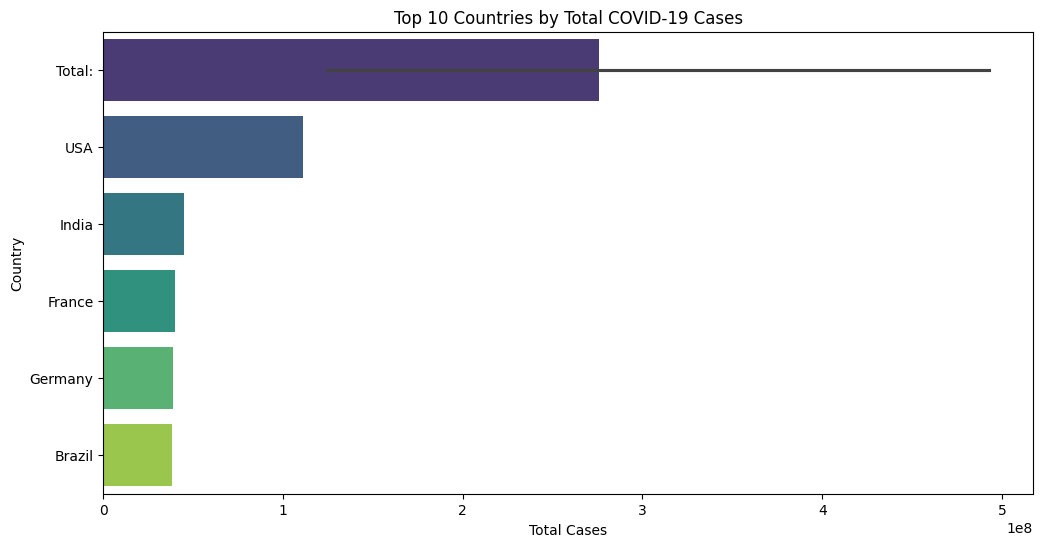

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

top_cases = df.sort_values('Total Cases', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_cases, x='Total Cases', y='Country', palette='viridis')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()


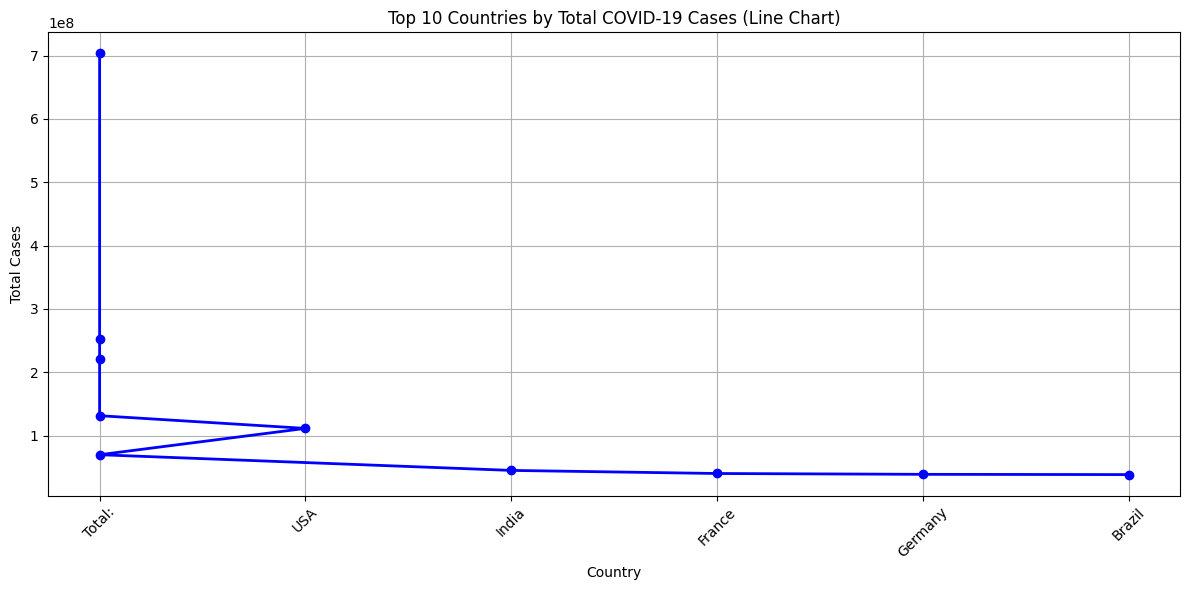

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

top_cases = df.sort_values('Total Cases', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.plot(top_cases['Country'], top_cases['Total Cases'], marker='o', color='blue', linewidth=2)
plt.title('Top 10 Countries by Total COVID-19 Cases (Line Chart)')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-13-155357944.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_deaths_per_million, x='Deaths/1M pop', y='Country', palette='rocket')


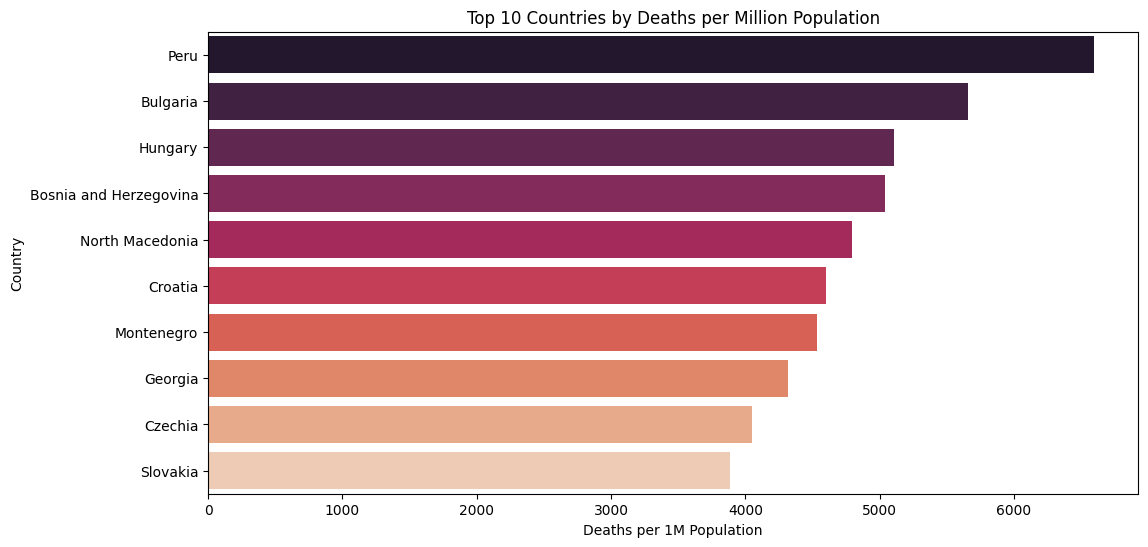

In [13]:
top_deaths_per_million = df.sort_values('Deaths/1M pop', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_deaths_per_million, x='Deaths/1M pop', y='Country', palette='rocket')
plt.title('Top 10 Countries by Deaths per Million Population')
plt.xlabel('Deaths per 1M Population')
plt.ylabel('Country')
plt.show()

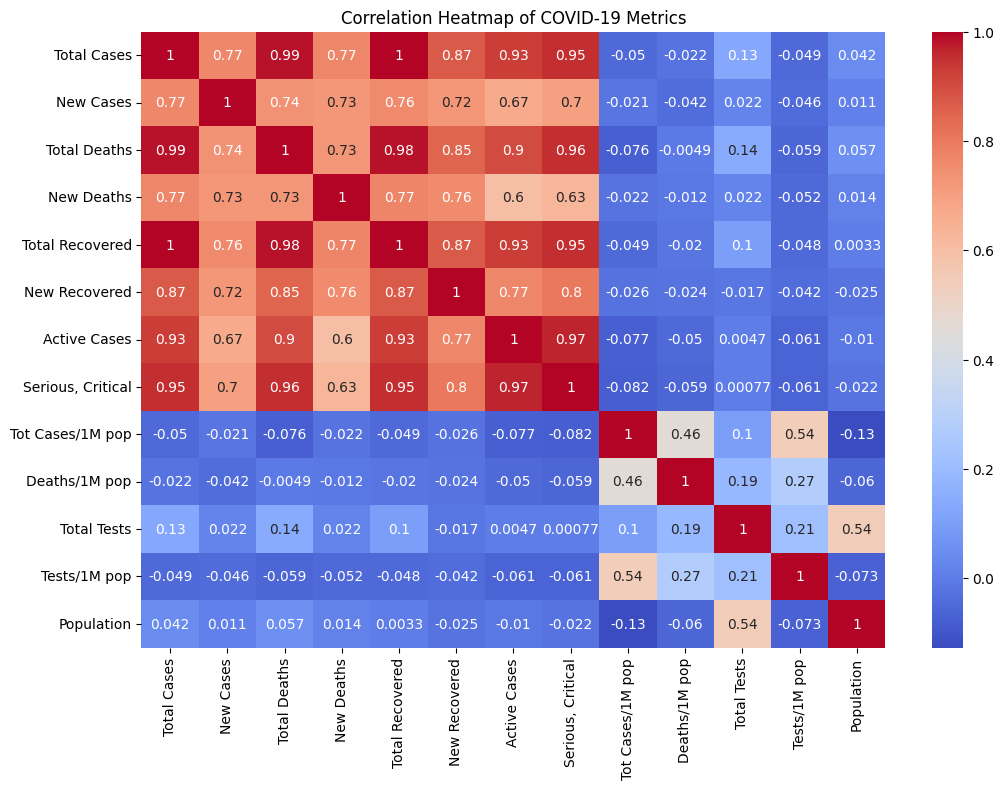

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=['Country']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.show()

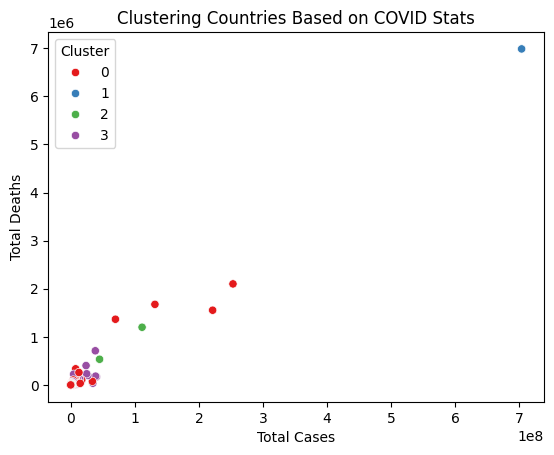

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Country'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x='Total Cases', y='Total Deaths', hue='Cluster', data=df, palette='Set1')
plt.title("Clustering Countries Based on COVID Stats")
plt.show()

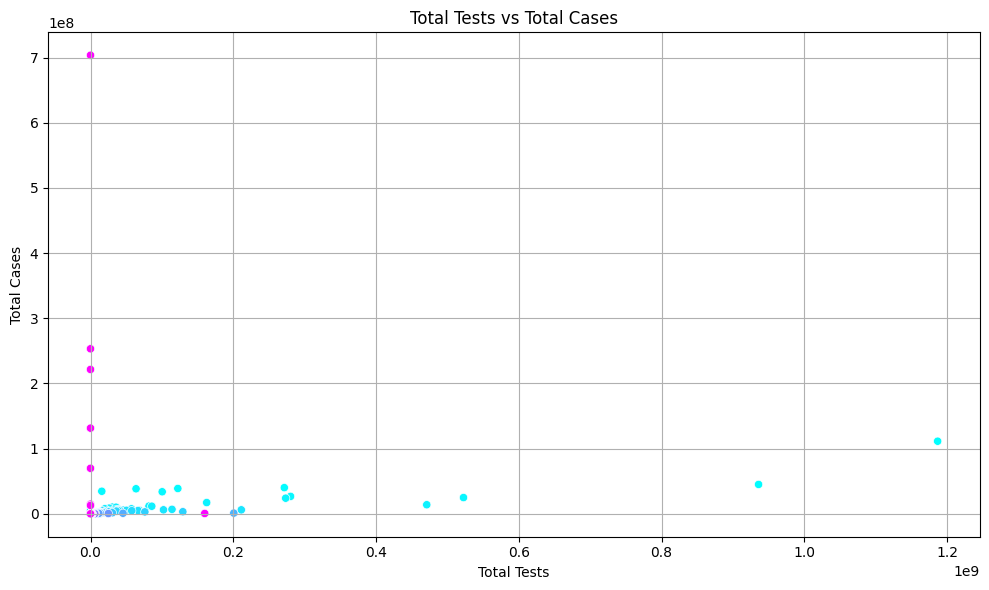

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Total Tests', y='Total Cases', hue='Country', palette='cool', legend=False)
plt.title('Total Tests vs Total Cases')
plt.xlabel('Total Tests')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

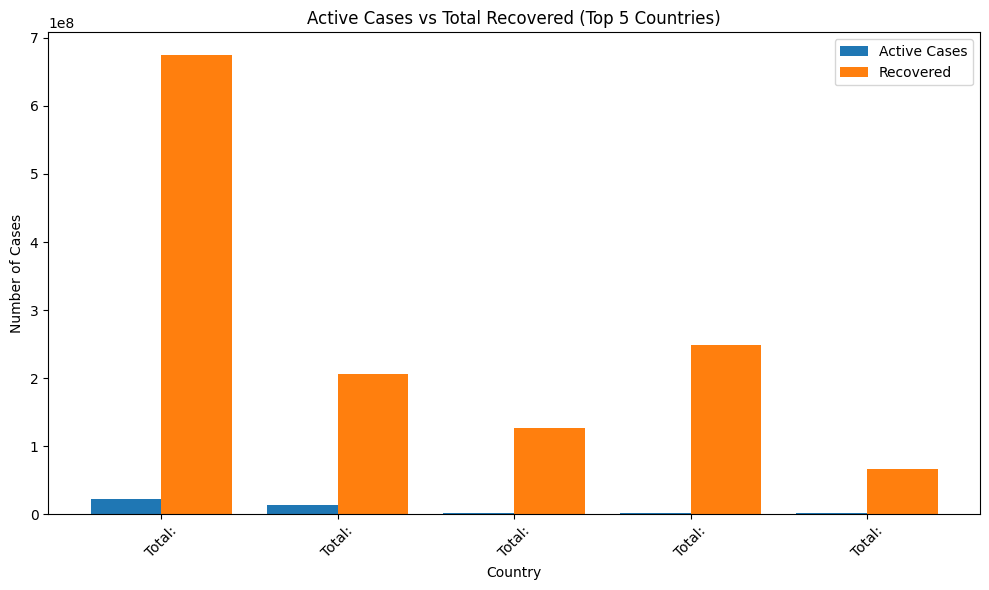

In [9]:
top_active_recovered = df.sort_values('Active Cases', ascending=False).head(5)

# Prepare Data
countries = top_active_recovered['Country']
active_cases = top_active_recovered['Active Cases']
recovered = top_active_recovered['Total Recovered']

# Plot
x = range(len(countries))
plt.figure(figsize=(10,6))
plt.bar(x, active_cases, width=0.4, label='Active Cases', align='center')
plt.bar([i + 0.4 for i in x], recovered, width=0.4, label='Recovered', align='center')

plt.xticks([i + 0.2 for i in x], countries, rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.title('Active Cases vs Total Recovered (Top 5 Countries)')
plt.legend()
plt.tight_layout()
plt.show()
